Dominos - Predictive Purchase Order System

Dataset Exploration - Sales

In [22]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Sales.csv")

# Check the DataFrame type
print(type(df))  

df.head() 

print("Dataset Overview:")
print(df.info())  # Data types, non-null count
print("\nSummary Statistics for Numerical Columns:")
print(df.describe())  # Summary statistics for numerical columns


# Count missing values per column
print("\nMissing Data Count per Column:")
missing_values = df.isnull().sum()
print(missing_values)

# Display rows that have missing data
print("\nRows with Missing Data:")
print(df[df.isnull().any(axis=1)])  # Display rows with missing values

# Unique Value Counts per Column

columns_of_interest = [
    'pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date', 
    'order_time', 'unit_price', 'total_price', 'pizza_size', 
    'pizza_category', 'pizza_ingredients'
]

# Print the number of unique values in each column
print("\nUnique Values Count per Column:")
for col in columns_of_interest:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

# Display the unique values for each column
print("\nUnique Values for Each Column:")
for col in columns_of_interest:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())

# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"\nNumber of Duplicate Rows: {len(duplicate_rows)}")
print(duplicate_rows)




<class 'pandas.core.frame.DataFrame'>
Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB
None

Summary Statistics for Numerical Columns:
           pizza_id      order_id      quantity    un

In [78]:
import pandas as pd

# Load your dataset
df = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Sales.csv")

# Check the DataFrame type
print(type(df))  

df.head() 

# Display rows with missing values in the pizza_ingredients column
missing_ingredients = df.loc[df['pizza_ingredients'].isnull()]

# Print the rows with missing values
print("Rows with missing values in 'pizza_ingredients':")
print(missing_ingredients)

<class 'pandas.core.frame.DataFrame'>
Rows with missing values in 'pizza_ingredients':
     pizza_id  order_id   pizza_name_id  quantity order_date order_time  \
580       581       254   five_cheese_l         1   4/1/2015   22:22:13   
581       582       255   five_cheese_l         1   5/1/2015   11:23:35   
582       583       255  green_garden_m         1   5/1/2015   11:23:35   
583       584       255      hawaiian_l         1   5/1/2015   11:23:35   
584       585       255   spinach_fet_m         1   5/1/2015   11:23:35   
585       586       256   pep_msh_pep_l         1   5/1/2015   11:56:06   
586       587       257      cali_ckn_l         1   5/1/2015   11:59:04   
630       631       277   four_cheese_m         1   5/1/2015   15:41:50   
631       632       278   ital_veggie_m         1   5/1/2015   15:49:21   
632       633       278    southw_ckn_l         1   5/1/2015   15:49:21   
633       634       279      cali_ckn_m         1   5/1/2015   16:07:03   
634       635

Data Cleaning - sales

Missing values before filling:
 pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64
Missing values after filling:
 pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

Processing column: pizza_id
Rows before removing outliers:
count    48620.000000
mean     24310.500000
std      14035.529381
min          1.000000
25%      12155.750000
50%      24310.500000
75%      36465.250000
max      48620.000000
Name: pizza_id, dtype: float64

Rows after removing outliers:
count    48620.000000
mean     24310.500000
std  

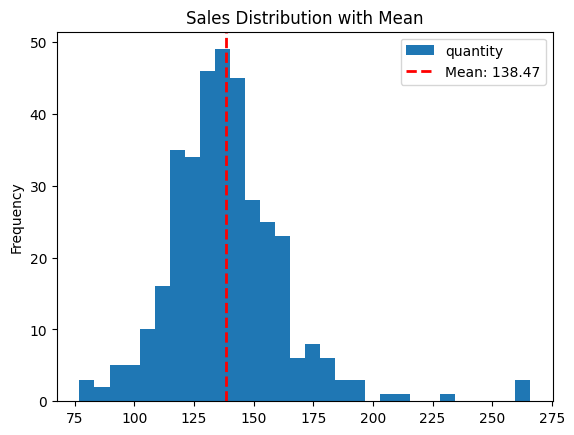

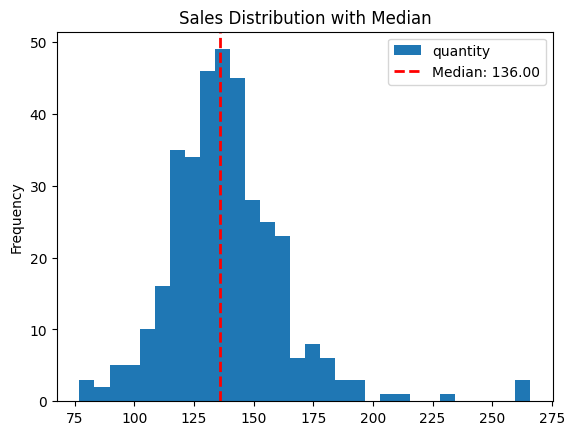

Processed data has been saved to: D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Processed_Sales_Data.csv


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import holidays

# Load your dataset
df = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Sales.csv")

# Step 1: Fill missing values
print("Missing values before filling:\n", df.isnull().sum())

# List of columns with missing values
columns_with_missing_values = ['pizza_name_id', 'total_price', 'pizza_category', 'pizza_ingredients', 'pizza_name']

# Function to fill missing values in the specified column using other columns
def fill_missing_values(data, column_to_fill, reference_columns):
    for idx, row in data[data[column_to_fill].isnull()].iterrows():
        ref_values = row[reference_columns]
        matching_row = data[(data[reference_columns] == ref_values).all(axis=1) & data[column_to_fill].notnull()]
        if not matching_row.empty:
            data.at[idx, column_to_fill] = matching_row[column_to_fill].values[0]

# Apply the function to each column with missing values
for column in columns_with_missing_values:
    ref_columns = [col for col in columns_with_missing_values if col != column]
    fill_missing_values(df, column, ref_columns)

print("Missing values after filling:\n", df.isnull().sum())

# Step 2: Replace specific values in 'pizza_ingredients'
df['pizza_ingredients'] = df['pizza_ingredients'].replace({
    'Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce': "Barbecue Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce",
    'Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese': "Chicken, Artichokes, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese",
    '?duja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic': "nduja Salami, Pancetta, Tomatoes, Red Onions, Friggitello Peppers, Garlic"
})

# Step 3: Remove outliers
def remove_outliers(df):
    # Get numerical columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    for numerical_column in numerical_columns:
        print(f"\nProcessing column: {numerical_column}")
        
        # Print rows before removing outliers
        print("Rows before removing outliers:")
        print(df[numerical_column].describe())
        
        # Calculate Q1, Q3, and IQR
        Q1 = df[numerical_column].quantile(0.25)
        Q3 = df[numerical_column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Filter out outliers
        df = df[(df[numerical_column] >= (Q1 - 1.5 * IQR)) & (df[numerical_column] <= (Q3 + 1.5 * IQR))]
        
        # Print rows after removing outliers
        print("\nRows after removing outliers:")
        print(df[numerical_column].describe())
    
    return df

df_filtered = remove_outliers(df)

# Step 4: Calculate statistics for numerical columns
stats = {
    'mean': [df_filtered['unit_price'].mean(), df_filtered['total_price'].mean(), df_filtered['quantity'].mean()],
    'median': [df_filtered['unit_price'].median(), df_filtered['total_price'].median(), df_filtered['quantity'].median()],
    'mode': [df_filtered['unit_price'].mode()[0], df_filtered['total_price'].mode()[0], df_filtered['quantity'].mode()[0]],
    'std': [df_filtered['unit_price'].std(), df_filtered['total_price'].std(), df_filtered['quantity'].std()],
    'var': [df_filtered['unit_price'].var(), df_filtered['total_price'].var(), df_filtered['quantity'].var()]
}

# View in DataFrame
compare = pd.DataFrame(stats, index=['unit_price', 'total_price', 'quantity'])
print(compare)

# Step 5: Parse 'order_date' column
# Define a list of date formats to try
date_formats = ['%d-%m-%Y', '%d/%m/%Y']

def parse_dates(date_str):
    for fmt in date_formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

# Apply the parsing function to the 'order_date' column
df['order_date'] = df['order_date'].apply(parse_dates)

# Convert to the desired format
df['order_date'] = df['order_date'].dt.strftime('%d-%m-%Y')

# Convert the date column to datetime
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y')

# Step 6: Extract time features
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month_name()
df['day_of_week'] = df['order_date'].dt.day_name()

# Verify the data types
print(df.dtypes)

# Step 7: Group by 'order_date' and sum 'quantity'
df_daily_count = df.groupby('order_date', as_index=False).agg({'quantity': 'sum'})

# Calculate mean and median sales thresholds
Mean_sales_threshold = df_daily_count['quantity'].mean()
Median_sales_threshold = df_daily_count['quantity'].median()

# Step 8: Visualize sales distribution with the mean
df_daily_count['quantity'].plot(kind='hist', bins=30, title='Sales Distribution with Mean')
plt.axvline(Mean_sales_threshold, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {Mean_sales_threshold:.2f}')
plt.legend()
plt.show()

# Step 9: Visualize sales distribution with the median
df_daily_count['quantity'].plot(kind='hist', bins=30, title='Sales Distribution with Median')
plt.axvline(Median_sales_threshold, color='r', linestyle='dashed', linewidth=2, label=f'Median: {Median_sales_threshold:.2f}')
plt.legend()
plt.show()

# Save the output as a CSV file
output_file_path = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Processed_Sales_Data.csv"
df.to_csv(output_file_path, index=False)

print("Processed data has been saved to:", output_file_path)



Feature Engineering - sales 

   order_date  quantity          sales_type
0  2015-01-01       162             Holiday
1  2015-01-02       165  Promotional Period
2  2015-01-03       158  Promotional Period
3  2015-01-04       106        Normal Sales
4  2015-01-05       125        Normal Sales


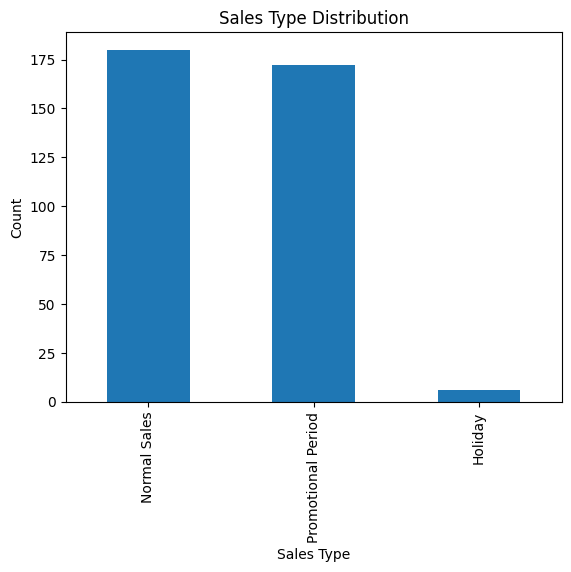

Output saved to: D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Final_Sales.csv


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import holidays

# Load the data
file_path = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Processed_Sales_Data.csv"
df = pd.read_csv(file_path)

# Assuming df has columns 'order_date' and 'quantity'
# Group by 'order_date' and sum 'quantity'
df_daily_count = df.groupby('order_date', as_index=False).agg({'quantity': 'sum'})

# Calculate the median sales threshold
Median_sales_threshold = df_daily_count['quantity'].median()

# Load US holidays for 2015
us_holidays = holidays.US(years=2015)

# Function to classify the date as 'Normal', 'Holiday', or 'Promotional Period'
def classify_sales(row):
    if row['quantity'] > Median_sales_threshold:
        if row['order_date'] in us_holidays:
            return 'Holiday'
        else:
            return 'Promotional Period'
    else:
        return 'Normal Sales'

# Apply the classification function
df_daily_count['sales_type'] = df_daily_count.apply(classify_sales, axis=1)

# Check the classified DataFrame
print(df_daily_count.head())

# Optional: Visualize the classified sales types
df_daily_count['sales_type'].value_counts().plot(kind='bar', title='Sales Type Distribution')
plt.xlabel('Sales Type')
plt.ylabel('Count')
plt.show()

# Convert sales_type to dummy variables
df_daily_count = pd.get_dummies(df_daily_count, columns=['sales_type'])

# Rename columns for clarity
df_daily_count = df_daily_count.rename(columns={
    'sales_type_Holiday': 'Holiday',
    'sales_type_Normal Sales': 'Normal Sales',
    'sales_type_Promotional Period': 'Promotional Period'
})

# Convert boolean columns to integer
df_daily_count['Holiday'] = df_daily_count['Holiday'].map({True: 1, False: 0})
df_daily_count['Normal Sales'] = df_daily_count['Normal Sales'].map({True: 1, False: 0})
df_daily_count['Promotional Period'] = df_daily_count['Promotional Period'].map({True: 1, False: 0})

# Merge the daily count with the original DataFrame
df = pd.merge(df, df_daily_count, on='order_date', how='inner')

# Rename columns to avoid conflicts
df = df.rename(columns={'quantity_x': 'quantity', 'quantity_y': 'Total quantity per day'})

# Save the output DataFrame to a CSV file
output_file_path = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Final_Sales.csv"
df.to_csv(output_file_path, index=False)

print("Output saved to:", output_file_path)


In [56]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,year,month,day_of_week,Total quantity per day,Holiday,Normal Sales,Promotional Period
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015,January,Thursday,162,1,0,0
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015,January,Thursday,162,1,0,0
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015,January,Thursday,162,1,0,0
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015,January,Thursday,162,1,0,0
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015,January,Thursday,162,1,0,0


Exploratory Data Analysis 

Pizzas sold in week 7:
The Barbecue Chicken Pizza: 54 pizzas
The Big Meat Pizza: 33 pizzas
The Brie Carre Pizza: 12 pizzas
The Calabrese Pizza: 18 pizzas
The California Chicken Pizza: 45 pizzas
The Chicken Alfredo Pizza: 19 pizzas
The Chicken Pesto Pizza: 19 pizzas
The Classic Deluxe Pizza: 39 pizzas
The Five Cheese Pizza: 30 pizzas
The Four Cheese Pizza: 45 pizzas
The Greek Pizza: 34 pizzas
The Green Garden Pizza: 26 pizzas
The Hawaiian Pizza: 45 pizzas
The Italian Capocollo Pizza: 27 pizzas
The Italian Supreme Pizza: 36 pizzas
The Italian Vegetables Pizza: 28 pizzas
The Mediterranean Pizza: 11 pizzas
The Mexicana Pizza: 35 pizzas
The Napolitana Pizza: 28 pizzas
The Pepper Salami Pizza: 17 pizzas
The Pepperoni Pizza: 55 pizzas
The Pepperoni, Mushroom, and Peppers Pizza: 24 pizzas
The Prosciutto and Arugula Pizza: 29 pizzas
The Sicilian Pizza: 53 pizzas
The Soppressata Pizza: 19 pizzas
The Southwest Chicken Pizza: 41 pizzas
The Spicy Italian Pizza: 33 pizzas
The Spinach Pesto Pizza: 15

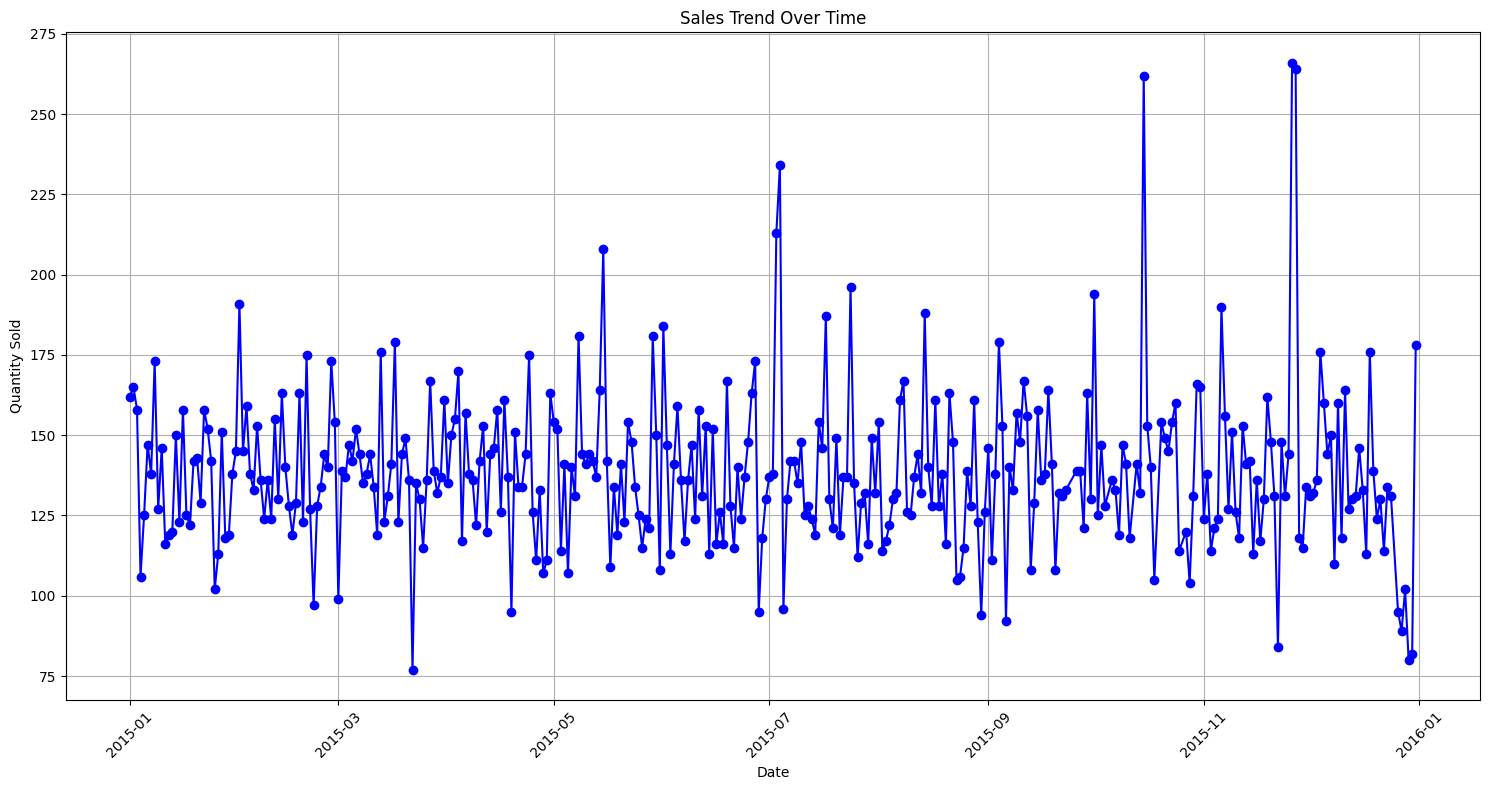

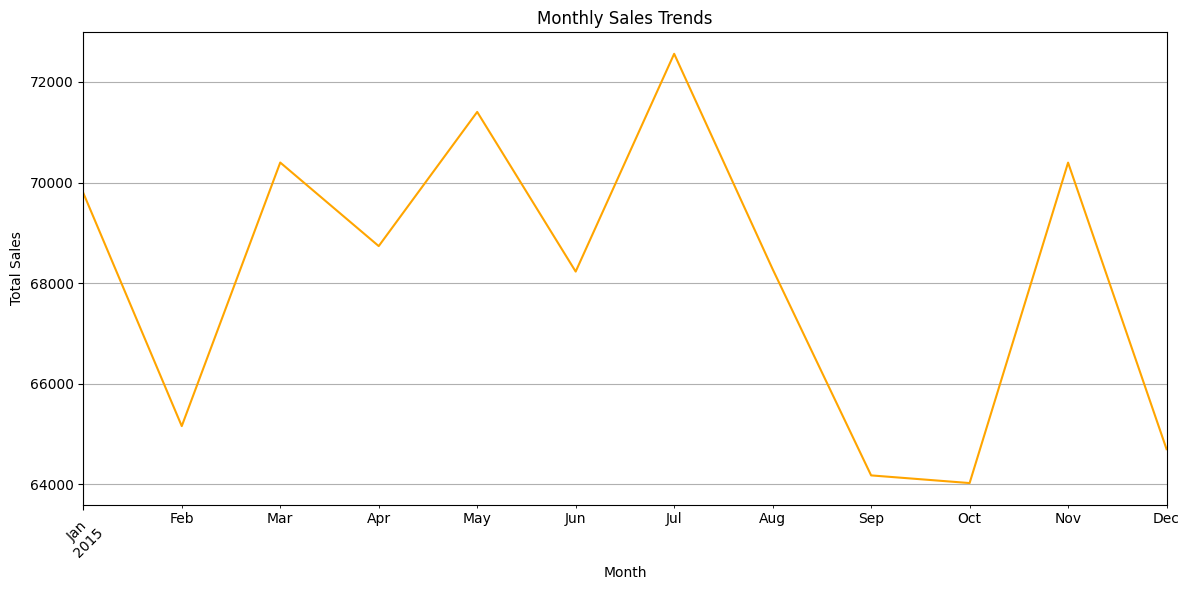

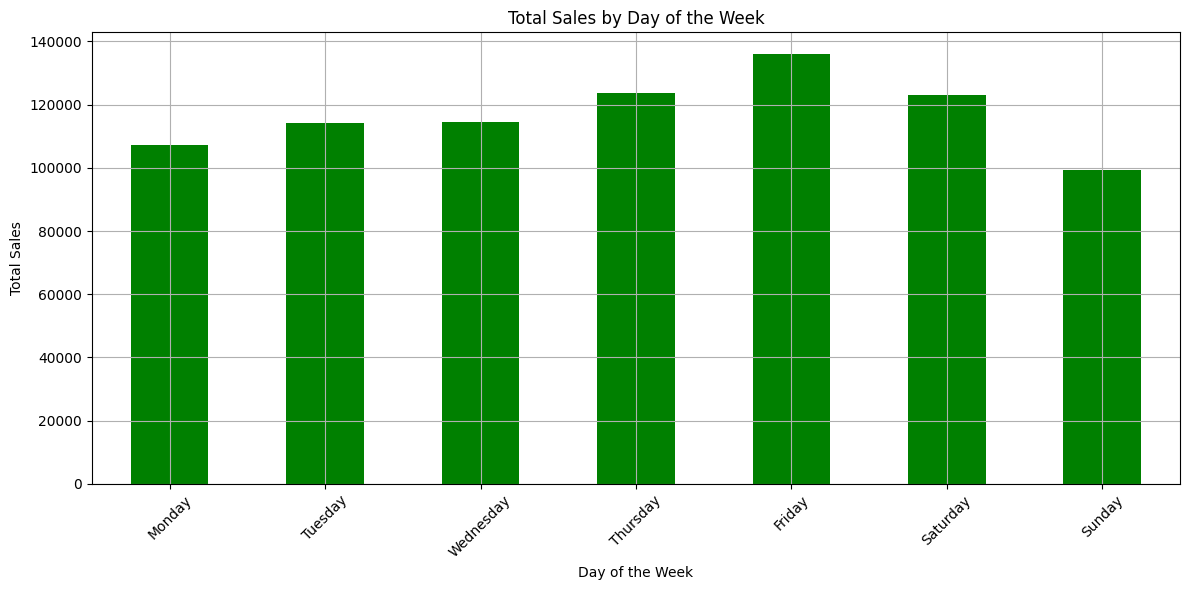

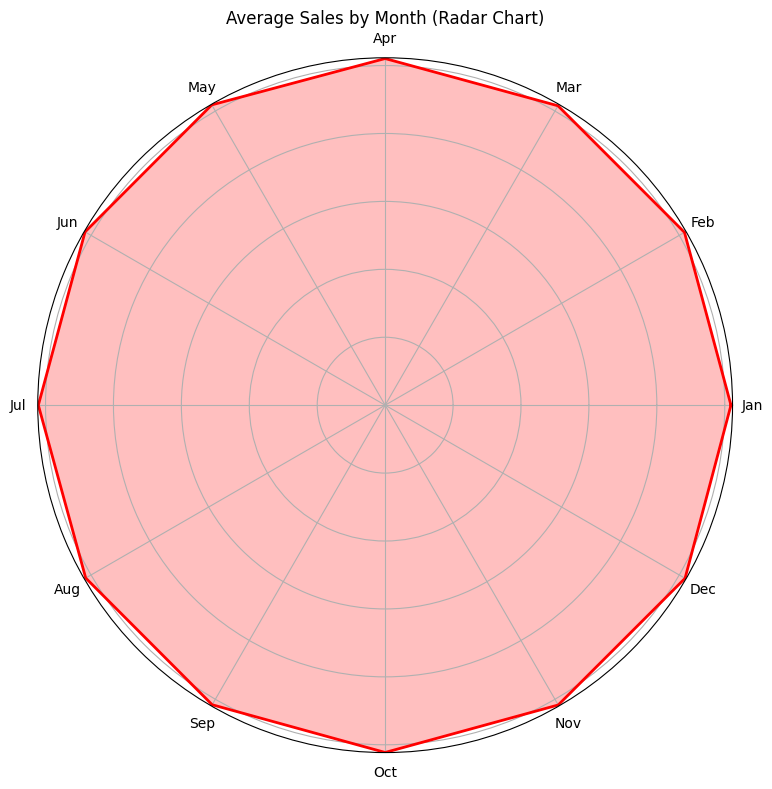

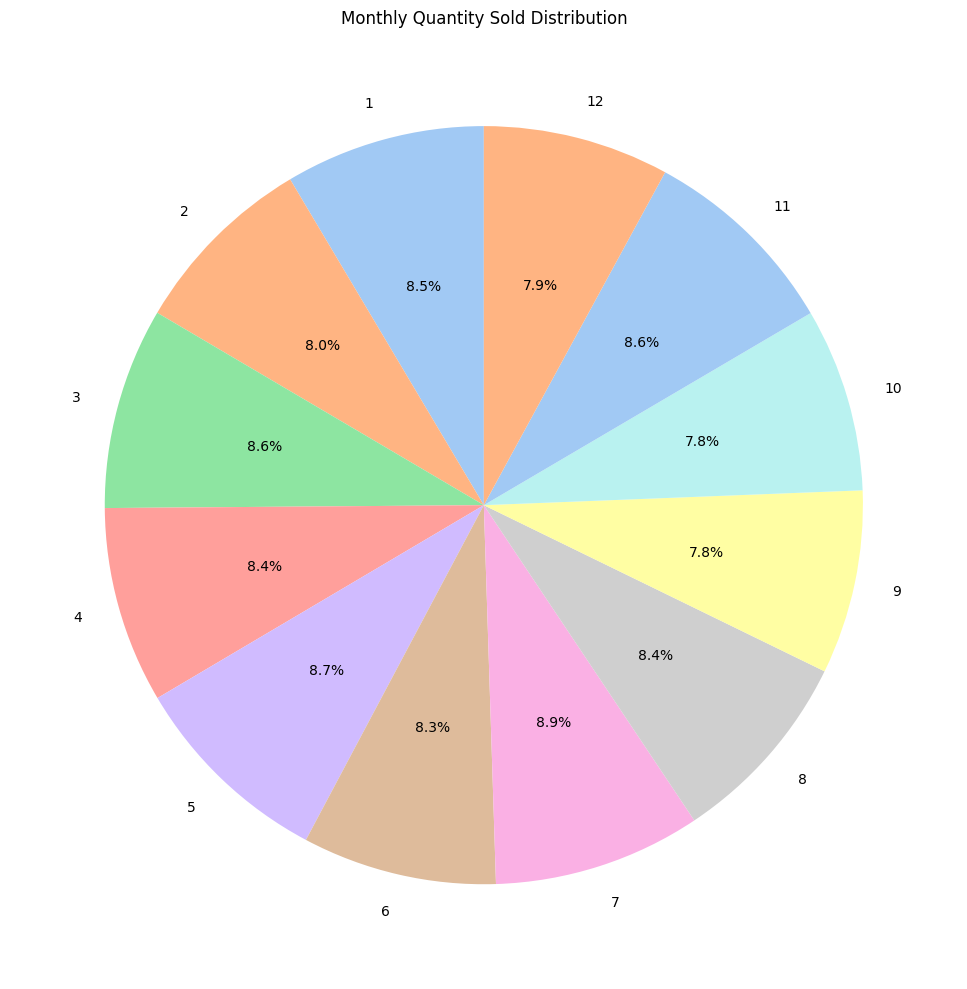

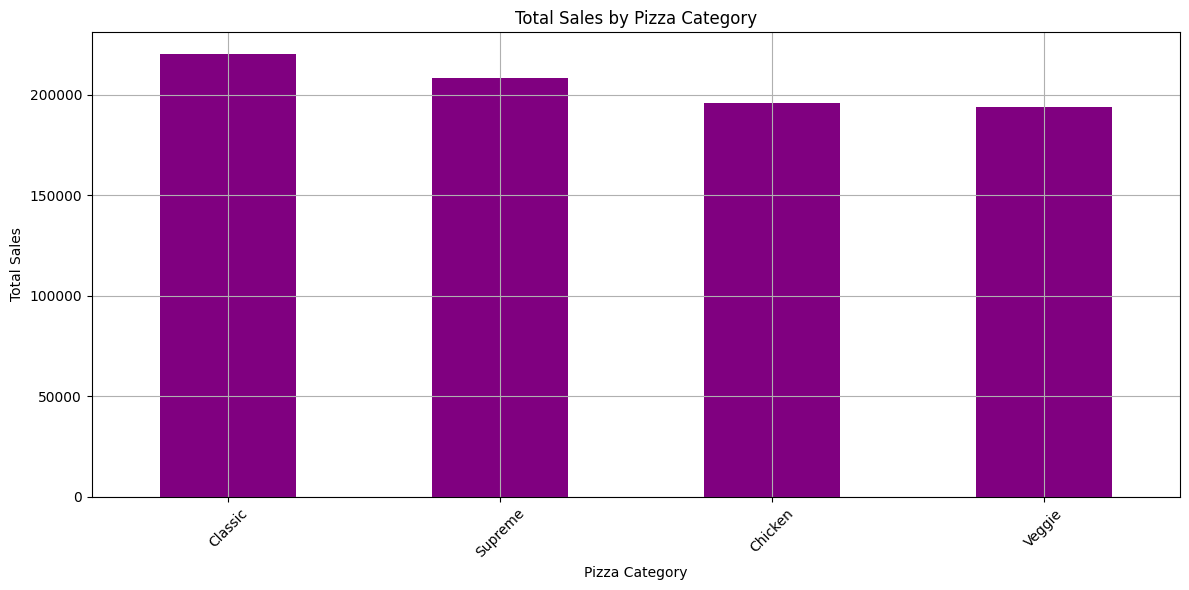

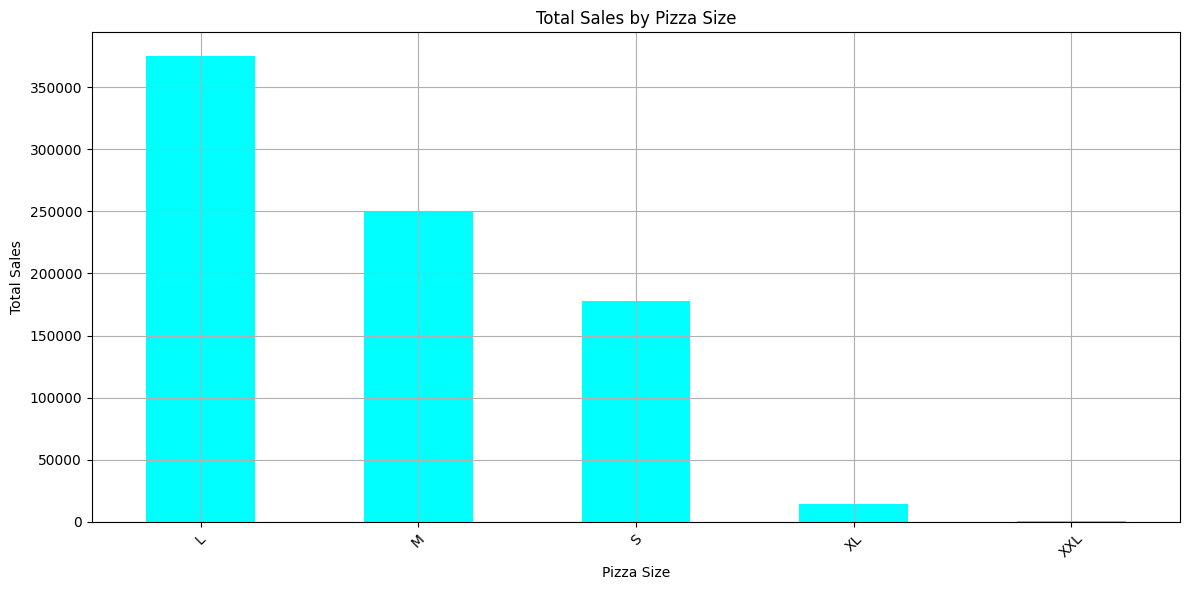

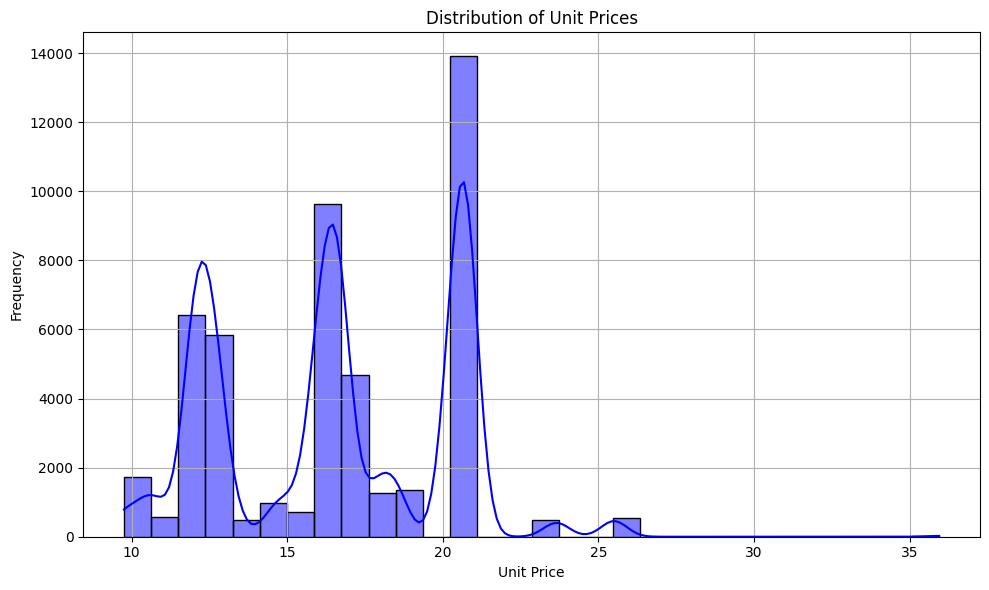

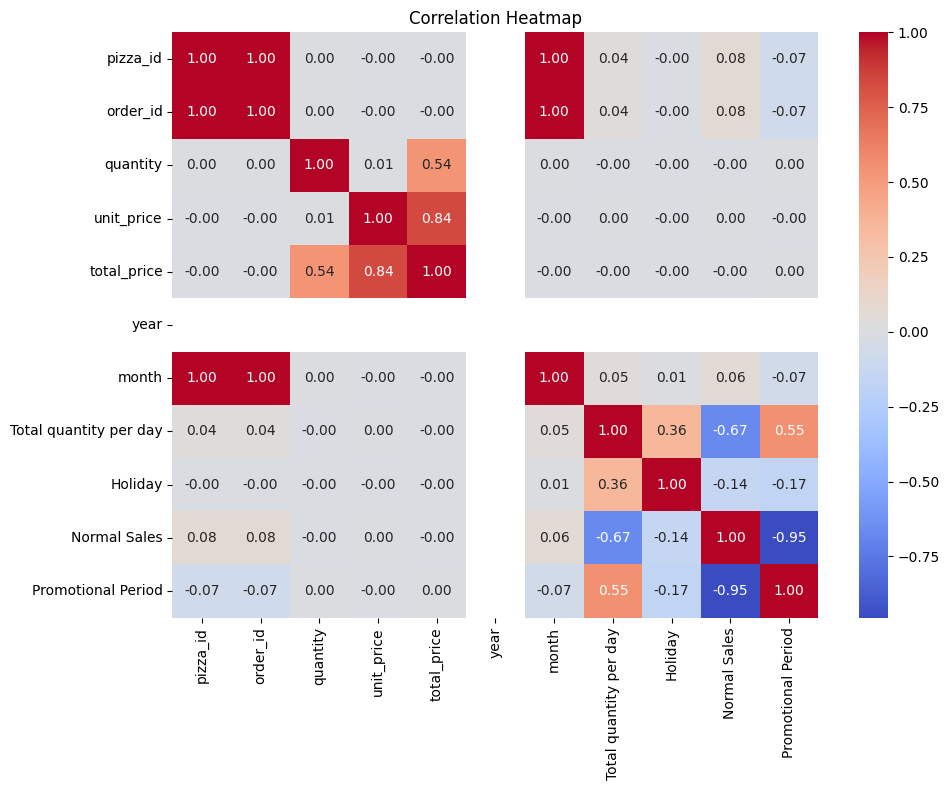

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Final_Sales.csv"
df = pd.read_csv(file_path)

# Ensure 'order_date' is in datetime format
pizza_sales['order_date'] = pd.to_datetime(pizza_sales['order_date'])

# Extract the week number from 'order_date'
pizza_sales['week'] = pizza_sales['order_date'].dt.isocalendar().week

# Step 1: Filter the pizza_sales dataset for any week (week 7)
week_7_sales = pizza_sales[pizza_sales['week'] == 7]

# Step 2: Group by pizza name and sum the quantities
grouped_sales = week_7_sales.groupby('pizza_name')['quantity'].sum().reset_index()

# Step 3: List all grouped pizza names and their total quantities
print("Pizzas sold in week 7:")
for _, row in grouped_sales.iterrows():
    print(f"{row['pizza_name']}: {row['quantity']} pizzas")

# Step 4: Calculate and print the total quantity sold in week 7
total_quantity_sold = week_7_sales['quantity'].sum()
print(f"\nTotal units of pizza sold in week 7: {total_quantity_sold} pizzas")

# Convert 'order_date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract additional time-based features
df['month'] = df['order_date'].dt.month
df['day_of_week'] = df['order_date'].dt.day_name()
df['year'] = df['order_date'].dt.year

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# 1. Sales Trend Over Time
sales_trend = df.groupby('order_date')['quantity'].sum().reset_index()

plt.figure(figsize=(15, 8))
plt.plot(sales_trend['order_date'], sales_trend['quantity'], marker='o', color='b')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 2. Monthly Sales Trends
df['total_price'] = pd.to_numeric(df['total_price'], errors='coerce')

monthly_sales = df.resample('M', on='order_date')['total_price'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(color='orange')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 3. Sales by Day of the Week
weekly_sales = df.groupby('day_of_week')['total_price'].sum()

ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_sales = weekly_sales.reindex(ordered_days)

plt.figure(figsize=(12, 6))
weekly_sales.plot(kind='bar', color='green')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 4. Average Sales by Month (Radar Chart)
monthly_avg_sales = df.groupby('month')['quantity'].mean()

labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values = monthly_avg_sales.tolist()
values += values[:1]  # Close the circle
angles += angles[:1]  # Close the circle

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.fill(angles, values, color='red', alpha=0.25)
ax.plot(angles, values, color='red', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Average Sales by Month (Radar Chart)')
plt.tight_layout()
plt.show()

# 5. Monthly Quantity Sold Distribution (Pie Chart)
monthly_quantity = df.groupby('month')['quantity'].sum()

plt.figure(figsize=(10, 10))
monthly_quantity.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Monthly Quantity Sold Distribution')
plt.ylabel('')  # Hides the y-label
plt.tight_layout()
plt.show()

# 6. Total Sales by Pizza Category
category_sales = df.groupby('pizza_category')['total_price'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
category_sales.plot(kind='bar', color='purple')
plt.title('Total Sales by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 7. Total Sales by Pizza Size
size_sales = df.groupby('pizza_size')['total_price'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
size_sales.plot(kind='bar', color='cyan')
plt.title('Total Sales by Pizza Size')
plt.xlabel('Pizza Size')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 8. Distribution of Unit Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['unit_price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()

# 9. Correlation Heatmap
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


Data Exploration - Ingredients

In [61]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Ingredients.csv")

# Display basic info about the DataFrame
print("DataFrame Info:")
df.info()

# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows: ", duplicates)

# Remove duplicate rows if any
df = df.drop_duplicates()

# Verify that there are no more duplicates
duplicates_after = df.duplicated().sum()
print("Number of duplicate rows after cleaning: ", duplicates_after)

# Get unique values for each column
unique_values = {column: df[column].unique() for column in df.columns}

# Print the unique values
for column, values in unique_values.items():
    print(f"Unique values for column '{column}':")
    print(values)
    print()  # Print an empty line for better readability


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  514 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB
Number of duplicate rows:  0
Number of duplicate rows after cleaning:  0
Unique values for column 'pizza_name_id':
['bbq_ckn_l' 'bbq_ckn_m' 'bbq_ckn_s' 'big_meat_s' 'brie_carre_s'
 'calabrese_l' 'calabrese_m' 'calabrese_s' 'cali_ckn_l' 'cali_ckn_m'
 'cali_ckn_s' 'ckn_alfredo_l' 'ckn_alfredo_m' 'ckn_alfredo_s'
 'ckn_pesto_l' 'ckn_pesto_m' 'ckn_pesto_s' 'classic_dlx_l' 'classic_dlx_m'
 'classic_dlx_s' 'five_cheese_l' 'four_cheese_l' 'four_cheese_m'
 'green_garden_l' 'green_garden_m' 'green_garden_s' 'hawaiian_l'
 'hawaiian_m' 'ha

Data Cleaning - Ingredients 

In [63]:
import pandas as pd

# Load the initial dataset
df = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Ingredients.csv")

# Fill the null values for 'Items_Qty_In_Grams' based on conditions
df.loc[(df['pizza_ingredients'] == 'Caramelized Onions') & (df['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 20.0
df.loc[(df['pizza_name_id'] == 'hawaiian_l') & (df['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 60.0
df.loc[(df['pizza_name_id'] == 'hawaiian_m') & (df['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 40.0
df.loc[(df['pizza_name_id'] == 'hawaiian_s') & (df['Items_Qty_In_Grams'].isnull()), 'Items_Qty_In_Grams'] = 20.0

# Convert 'Items_Qty_In_Grams' to integer type
df['Items_Qty_In_Grams'] = df['Items_Qty_In_Grams'].astype(int)

# Replace specific ingredient names for consistency
df['pizza_ingredients'] = df['pizza_ingredients'].replace({'Barbecued Chicken': "Barbecue Chicken", '?duja Salami': "nduja Salami"})

# Save the cleaned DataFrame to a new CSV file
Output_path = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Final_Ingredients.csv"
df.to_csv(Output_path, index=False)

# Display basic information about the loaded ingredients data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   pizza_name_id       518 non-null    object
 1   pizza_name          518 non-null    object
 2   pizza_ingredients   518 non-null    object
 3   Items_Qty_In_Grams  518 non-null    int32 
dtypes: int32(1), object(3)
memory usage: 14.3+ KB


Model Selection& Training

 Prophet 

10:20:02 - cmdstanpy - INFO - Chain [1] start processing
10:20:02 - cmdstanpy - INFO - Chain [1] done processing


Prophet Model MAPE: 0.19


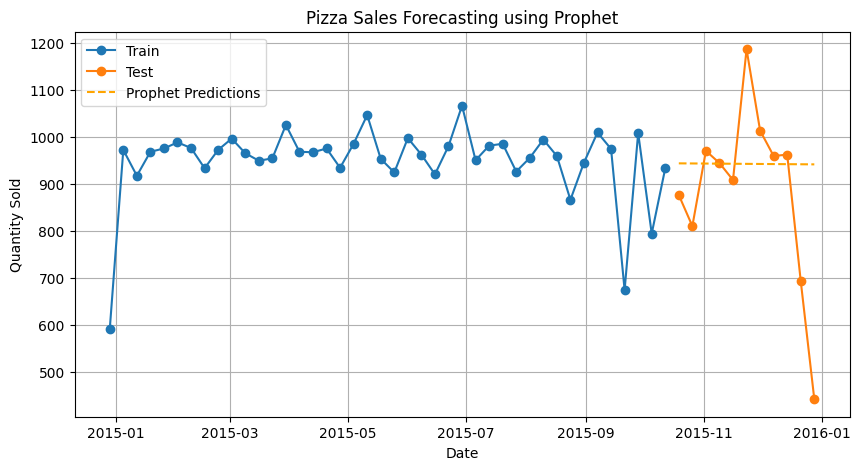

In [68]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error as mape
import warnings
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# Step 1: Load Data
file_path = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Final_Sales.csv"
pizza_sales = pd.read_csv(file_path)

# Data Preparation - Aggregate pizza sales by week
def prepare_weekly_sales(df):
    # Ensure 'order_date' is in datetime format
    df['order_date'] = pd.to_datetime(df['order_date'])
    
    # Group by week and sum quantities
    weekly_sales = df.groupby(df['order_date'].dt.to_period('W').apply(lambda r: r.start_time))['quantity'].sum().reset_index()
    weekly_sales.columns = ['ds', 'y']  # Rename columns for Prophet
    return weekly_sales

# Prepare weekly sales data
pizza_sales_weekly = prepare_weekly_sales(pizza_sales)

# Step 2: Split data into training and test sets (80% train, 20% test)
train_size = int(0.8 * len(pizza_sales_weekly))
train, test = pizza_sales_weekly[:train_size], pizza_sales_weekly[train_size:]

# Step 3: Train and forecast with Prophet
def train_prophet_model(train, test):
    model = Prophet()
    model.fit(train)  # Fit the model

    # Create future dataframe for forecasting
    future = model.make_future_dataframe(periods=len(test), freq='W')
    forecast = model.predict(future)  # Predict future values

    predictions = forecast['yhat'][-len(test):].values  # Get predictions for the test set
    return predictions

# Train the model and get predictions
prophet_predictions = train_prophet_model(train, test)

# Calculate MAPE for Prophet model
prophet_mape_score = mape(test['y'], prophet_predictions)
print(f"Prophet Model MAPE: {prophet_mape_score:.2f}")

# Optional: Plot the results
plt.figure(figsize=(10, 5))
plt.plot(train['ds'], train['y'], label='Train', marker='o')
plt.plot(test['ds'], test['y'], label='Test', marker='o')
plt.plot(test['ds'], prophet_predictions, label='Prophet Predictions', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.title('Pizza Sales Forecasting using Prophet')
plt.legend()
plt.grid()
plt.show()


Actual vs Predicted Sales 

10:15:48 - cmdstanpy - INFO - Chain [1] start processing
10:15:48 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE): 10.28%


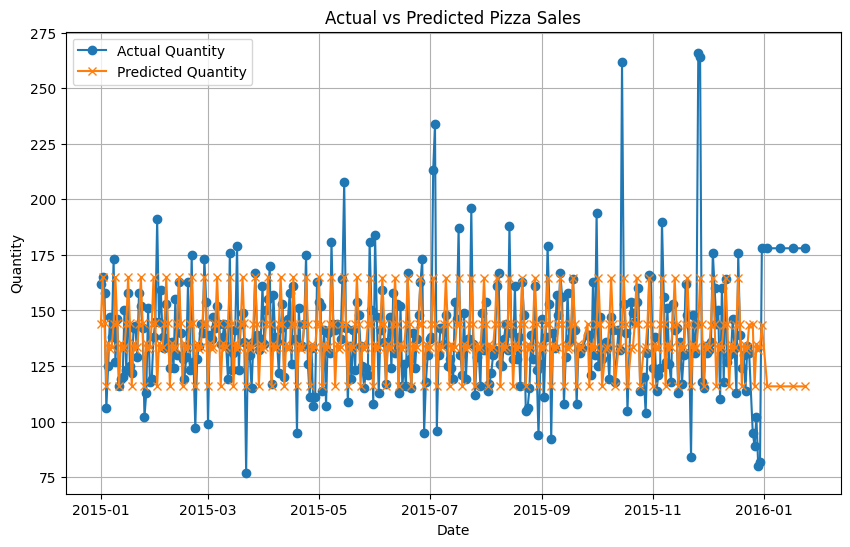

In [65]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Load the sales data
sales_data = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Final_Sales.csv")

# Ensure order_date is in datetime format
sales_data['order_date'] = pd.to_datetime(sales_data['order_date'])

# Aggregate sales data to weekly (assuming you want weekly sales)
weekly_sales = sales_data.groupby('order_date').agg({'quantity': 'sum'}).reset_index()
weekly_sales.columns = ['order_date', 'quantity']

# Prepare the data for Prophet
prophet_data = weekly_sales[['order_date', 'quantity']]
prophet_data.columns = ['ds', 'y']  # Prophet expects 'ds' for date and 'y' for value

# Train the Prophet model
model = Prophet()
model.fit(prophet_data)

# Create a DataFrame to hold future dates for predictions
future = model.make_future_dataframe(periods=4, freq='W')  # Adjust the periods as needed (e.g., 4 weeks ahead)

# Make predictions
forecast = model.predict(future)

# Ensure the 'ds' column in forecast is also in datetime format
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Merging the forecast with the actual data to calculate MAPE
# Get actual values for the forecast period
actual_sales = weekly_sales.set_index('order_date').reindex(forecast['ds'], method='ffill').reset_index()
actual_sales.columns = ['ds', 'actual_quantity']

# Ensure the 'ds' column in actual_sales is in datetime format
actual_sales['ds'] = pd.to_datetime(actual_sales['ds'])

# Merge actual and predicted values
merged_data = pd.merge(forecast[['ds', 'yhat']], actual_sales, on='ds', how='left')
merged_data.columns = ['ds', 'predicted_quantity', 'actual_quantity']

# Calculate MAPE
merged_data['mape'] = abs((merged_data['actual_quantity'] - merged_data['predicted_quantity']) / merged_data['actual_quantity']) * 100

# Print the MAPE
mape_value = merged_data['mape'].mean()
print(f'Mean Absolute Percentage Error (MAPE): {mape_value:.2f}%')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(merged_data['ds'], merged_data['actual_quantity'], label='Actual Quantity', marker='o')
plt.plot(merged_data['ds'], merged_data['predicted_quantity'], label='Predicted Quantity', marker='x')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Actual vs Predicted Pizza Sales')
plt.legend()
plt.grid()
plt.show()


Purchase Order Prediction

In [76]:
import pandas as pd
from prophet import Prophet
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the pizza sales data
pizza_sales = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Final_Sales.csv")

# Step 1: Data Preparation - Aggregate pizza sales by week and pizza type
def prepare_weekly_sales_by_pizza(df):
    df['order_date'] = pd.to_datetime(df['order_date'])
    df['week'] = df['order_date'].dt.to_period('W').apply(lambda r: r.start_time)
    weekly_sales_by_pizza = df.groupby(['week', 'pizza_name_id'])['quantity'].sum().reset_index()
    weekly_sales_by_pizza.rename(columns={'week': 'ds', 'quantity': 'y'}, inplace=True)
    return weekly_sales_by_pizza

pizza_sales_weekly_by_pizza = prepare_weekly_sales_by_pizza(pizza_sales)

# Step 2: Create a function to forecast for each pizza type
def forecast_sales_per_pizza_type(pizza_type, train, periods=7):
    # Initialize the Prophet model
    model = Prophet()
    model.fit(train)
    
    # Create a dataframe for future predictions
    future = model.make_future_dataframe(periods=periods, freq='D')
    
    # Forecast
    forecast = model.predict(future)
    
    # Extract the forecast for the specified period
    forecasted_values = forecast[['ds', 'yhat']].tail(periods)['yhat'].tolist()
    
    return pizza_type, forecasted_values

# Step 3: Forecast for each pizza type for the next week
def forecast_next_week_sales_by_pizza_type(pizza_sales_weekly_by_pizza, periods=7):
    # Dictionary to store the forecasted sales for each pizza type
    pizza_type_forecasts = {}

    # Calculate total sales per pizza type
    total_units_sold = pizza_sales_weekly_by_pizza.groupby('pizza_name_id')['y'].sum()

    # Get the last week's date range
    last_week = pizza_sales_weekly_by_pizza['ds'].max()
    next_week_start = last_week + pd.Timedelta(weeks=1)
    next_week_end = next_week_start + pd.Timedelta(days=6)

    # Loop through each pizza type
    for pizza_type in pizza_sales_weekly_by_pizza['pizza_name_id'].unique():
        # Filter the data for this pizza type
        pizza_type_data = pizza_sales_weekly_by_pizza[pizza_sales_weekly_by_pizza['pizza_name_id'] == pizza_type]
        
        # Prepare the data for Prophet
        train = pizza_type_data[['ds', 'y']]

        # Forecast sales for the next week for this pizza type
        pizza_type, forecast = forecast_sales_per_pizza_type(pizza_type, train, periods)

        # Store the forecast in the dictionary
        if forecast:
            pizza_type_forecasts[pizza_type] = forecast  # The forecast is already a list

    return pizza_type_forecasts, total_units_sold, next_week_start, next_week_end

# Step 4: Forecast pizza sales for the next week
next_week_pizza_sales_forecasts, total_units_sold, next_week_start, next_week_end = forecast_next_week_sales_by_pizza_type(pizza_sales_weekly_by_pizza, periods=7)

# Display the forecasted sales for each pizza type and the total quantity of units sold in the predicted week
print(f"Forecasted sales for the week {next_week_start.date()} to {next_week_end.date()}:")

total_forecasted_quantity = 0  # To accumulate the forecasted quantities

for pizza_type, forecast in next_week_pizza_sales_forecasts.items():
    forecast_quantity = int(sum(forecast))  # Sum the forecasted values for the week
    next_week_pizza_sales_forecasts[pizza_type] = forecast_quantity
    print(f'{pizza_type}: {forecast_quantity} pizzas')
    total_forecasted_quantity += forecast_quantity

# Display the total quantity of units sold in the predicted week
print(f"Total quantity of units sold in the predicted week: {total_forecasted_quantity} pizzas")

# Step 5: Load the ingredients data
ingredients = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Final_Ingredients.csv")

# Copy ingredients, map predicted sales, and calculate total ingredient quantity
ingredients_predicted = ingredients.copy()

# Assuming each pizza requires certain quantities of ingredients
# 'pizza_name_id' should exist in the ingredients DataFrame to map quantities
ingredients_predicted['predicted_quantity'] = ingredients_predicted['pizza_name_id'].map(next_week_pizza_sales_forecasts)
ingredients_predicted['total_ingredient_qty'] = ingredients_predicted['Items_Qty_In_Grams'] * ingredients_predicted['predicted_quantity']

# Grouping the ingredients by ingredient type and summing the total ingredient quantity
grouped_ingredients_totals = ingredients_predicted.groupby('pizza_ingredients')['total_ingredient_qty'].sum().reset_index()

# Adding a new column for total ingredient quantity in kilograms
grouped_ingredients_totals['total_ingredient_qty_kg'] = grouped_ingredients_totals['total_ingredient_qty'] / 1000

# Display the results for grouped predicted ingredients
print("\nTotal quantity of predicted ingredients for the following week (grouped):")
for index, row in grouped_ingredients_totals.iterrows():
    ingredient = row['pizza_ingredients']
    total_qty_grams = row['total_ingredient_qty']
    total_qty_kg = row['total_ingredient_qty_kg']
    print(f'{ingredient}: {total_qty_grams} grams ({total_qty_kg:.2f} kg)')

# Optionally, you can save the grouped totals to a CSV file for the purchase order
purchase_order_output_path = r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Purchase_Order.csv"
grouped_ingredients_totals.to_csv(purchase_order_output_path, index=False)


10:49:11 - cmdstanpy - INFO - Chain [1] start processing
10:49:12 - cmdstanpy - INFO - Chain [1] done processing
10:49:12 - cmdstanpy - INFO - Chain [1] start processing
10:49:13 - cmdstanpy - INFO - Chain [1] done processing
10:49:13 - cmdstanpy - INFO - Chain [1] start processing
10:49:13 - cmdstanpy - INFO - Chain [1] done processing
10:49:13 - cmdstanpy - INFO - Chain [1] start processing
10:49:14 - cmdstanpy - INFO - Chain [1] done processing
10:49:14 - cmdstanpy - INFO - Chain [1] start processing
10:49:14 - cmdstanpy - INFO - Chain [1] done processing
10:49:14 - cmdstanpy - INFO - Chain [1] start processing
10:49:14 - cmdstanpy - INFO - Chain [1] done processing
10:49:14 - cmdstanpy - INFO - Chain [1] start processing
10:49:14 - cmdstanpy - INFO - Chain [1] done processing
10:49:15 - cmdstanpy - INFO - Chain [1] start processing
10:49:15 - cmdstanpy - INFO - Chain [1] done processing
10:49:15 - cmdstanpy - INFO - Chain [1] start processing
10:49:15 - cmdstanpy - INFO - Chain [1]

Forecasted sales for the week 2016-01-04 to 2016-01-10:
bbq_ckn_l: 116 pizzas
bbq_ckn_m: 113 pizzas
bbq_ckn_s: 60 pizzas
big_meat_s: 251 pizzas
brie_carre_s: 62 pizzas
calabrese_m: 73 pizzas
calabrese_s: 13 pizzas
cali_ckn_l: 121 pizzas
cali_ckn_m: 114 pizzas
cali_ckn_s: 67 pizzas
ckn_alfredo_l: 25 pizzas
ckn_alfredo_m: 89 pizzas
ckn_alfredo_s: 17 pizzas
ckn_pesto_l: 46 pizzas
ckn_pesto_m: 41 pizzas
ckn_pesto_s: 36 pizzas
classic_dlx_l: 63 pizzas
classic_dlx_m: 165 pizzas
classic_dlx_s: 103 pizzas
five_cheese_l: 161 pizzas
four_cheese_l: 167 pizzas
four_cheese_m: 70 pizzas
green_garden_l: 12 pizzas
green_garden_m: 33 pizzas
green_garden_s: 74 pizzas
hawaiian_l: 123 pizzas
hawaiian_m: 63 pizzas
hawaiian_s: 133 pizzas
ital_cpcllo_l: 94 pizzas
ital_cpcllo_m: 45 pizzas
ital_cpcllo_s: 36 pizzas
ital_supr_l: 98 pizzas
ital_supr_m: 109 pizzas
ital_supr_s: 24 pizzas
ital_veggie_l: 21 pizzas
ital_veggie_m: 57 pizzas
ital_veggie_s: 33 pizzas
mediterraneo_l: 48 pizzas
mediterraneo_m: 40 pizzas
me

In [77]:
import pandas as pd 
import pandas as pd 

df = pd.read_csv(r"D:\Guvi\projects\Dominos_Predictive_Purchase_Order_System\Purchase_Order.csv")
df.info()

# Set display option to show all rows
pd.set_option("display.max_rows", None)

# Display the DataFrame
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pizza_ingredients        64 non-null     object 
 1   total_ingredient_qty     64 non-null     int64  
 2   total_ingredient_qty_kg  64 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


,pizza_ingredients,total_ingredient_qty,total_ingredient_qty_kg
0,Alfredo Sauce,2005,2.005
1,Anchovies,5345,5.345
2,Artichokes,15830,15.830
3,Arugula,1925,1.925
4,Asiago Cheese,8880,8.880
5,Bacon,66860,66.860
6,Barbecue Chicken,9230,9.230
7,Barbecue Sauce,3170,3.170
8,Beef Chuck Roast,18830,18.830
9,Blue Cheese,4830,4.830
